<a href="https://colab.research.google.com/github/mcmejiag14/Deep-Learning/blob/main/Machine_Learning_Case_Study_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Case Study 2 Machine Learning**









First we are going to mount google drive to our code to be able to have our dataset

In [65]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.metrics import roc_curve

In [67]:
# Import my file
csv_file_path = '/content/drive/MyDrive/Machine Learning Case Study 2/ClassifyRisk_Dataset(1).csv'
# Read the CSV file into a DataFrame
ClassifyRisk= pd.read_csv(csv_file_path)

In [68]:
len(ClassifyRisk)

246

In [69]:
ClassifyRisk

,Age,Maritial,Mortgage,Loan Type,Income,Risk
0,44.0,other,y,3.0,36060.70,bad loss
1,41.0,other,n,2.0,36009.34,bad loss
2,46.0,other,n,2.0,35614.60,bad loss
3,42.0,other,y,2.0,35287.18,bad loss
4,36.0,other,y,2.0,34954.06,bad loss
...,...,...,...,...,...,...
241,24.0,single,y,0.0,34810.12,good risk
242,16.0,single,y,0.0,33709.78,good risk
243,21.0,single,y,0.0,32896.42,good risk
244,23.0,single,y,0.0,32301.52,good risk


### **QUESTION 1**

Here we are going to find and graph the missing values fo each of the variables.

In [70]:
# Check for missing values
missing_values = ClassifyRisk.isnull().sum()

# Display the result
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
Age          1
Maritial     0
Mortgage     0
Loan Type    1
Income       2
Risk         0
dtype: int64


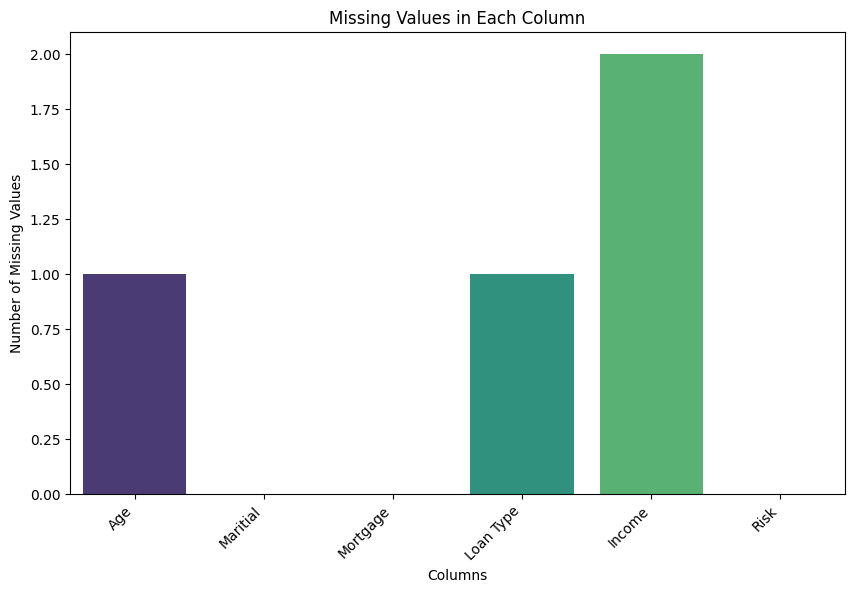

In [71]:
# Plotting the missing values
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, palette='viridis')
plt.title('Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

Now, we will check if we need to remove the missing values or we just need to keep it depending if the observation apport information to our dataset.

In [72]:
# Find rows with missing values
rows_with_missing_values = ClassifyRisk[ClassifyRisk.isnull().any(axis=1)]

# Display the rows with missing values
print("Rows with missing values:")
print(rows_with_missing_values)

Rows with missing values:
     Age Maritial Mortgage  Loan Type  Income      Risk
10   NaN    other        n        NaN     NaN  bad loss
14  42.0    other        y        2.0     NaN  bad loss


As observation 10 has 3 missing values, we could get rid of this row because it does not apport anything to our model.  In obersvation 14 we decided also to remove  from the dataset.

In [73]:
# Remove rows with missing values
ClassifyRisk1 = ClassifyRisk.dropna()
ClassifyRisk1

,Age,Maritial,Mortgage,Loan Type,Income,Risk
0,44.0,other,y,3.0,36060.70,bad loss
1,41.0,other,n,2.0,36009.34,bad loss
2,46.0,other,n,2.0,35614.60,bad loss
3,42.0,other,y,2.0,35287.18,bad loss
4,36.0,other,y,2.0,34954.06,bad loss
...,...,...,...,...,...,...
241,24.0,single,y,0.0,34810.12,good risk
242,16.0,single,y,0.0,33709.78,good risk
243,21.0,single,y,0.0,32896.42,good risk
244,23.0,single,y,0.0,32301.52,good risk


In [74]:
# Here we will check the variable Maritial how many classes it have
unique_classes = ClassifyRisk1['Maritial'].unique()

print("Unique Classes:", unique_classes)

Unique Classes: ['other' 'none' 'married' 'single']


In [75]:
# We replace none by other
ClassifyRisk1['Maritial'] = ClassifyRisk1['Maritial'].replace('none', 'other')

<ipython-input-75-cf0cbbb2332b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ClassifyRisk1['Maritial'] = ClassifyRisk1['Maritial'].replace('none', 'other')


In [76]:
# Now, check the unique classes again
unique_classes = ClassifyRisk1['Maritial'].unique()
print("Unique Classes:", unique_classes)

Unique Classes: ['other' 'married' 'single']


In [61]:
# Checking the classes in Mortgage
unique_classes = ClassifyRisk1['Mortgage'].unique()

print("Unique Classes:", unique_classes)

Unique Classes: ['y' 'n' '"']


In [62]:
# We need to check which observations have the class '"'
observations= ClassifyRisk1[ClassifyRisk1['Mortgage'] == '"']

# Print all observations for the '""' class
print(observations)

    Age Maritial Mortgage Loan Type   Income      Risk
7  44.0    other        "       2.0  31888.3  bad loss


In [77]:
#Now we need to get rid of column 7 because even if the information is there, it looks like a missing value
# Removing row 7 from my dataset
ClassifyRisk1 = ClassifyRisk1.drop(7)

In [78]:
ClassifyRisk1

,Age,Maritial,Mortgage,Loan Type,Income,Risk
0,44.0,other,y,3.0,36060.70,bad loss
1,41.0,other,n,2.0,36009.34,bad loss
2,46.0,other,n,2.0,35614.60,bad loss
3,42.0,other,y,2.0,35287.18,bad loss
4,36.0,other,y,2.0,34954.06,bad loss
...,...,...,...,...,...,...
241,24.0,single,y,0.0,34810.12,good risk
242,16.0,single,y,0.0,33709.78,good risk
243,21.0,single,y,0.0,32896.42,good risk
244,23.0,single,y,0.0,32301.52,good risk


### **QUESTION 2**

2. Now, let's check that the dataset does not have any other mising value. In addition, we will do the summary of the variables and the descriptive analysis.



In [79]:
# Check for missing values
print("\nMissing Values:")
print(ClassifyRisk1.isnull().sum())


Missing Values:
Age          0
Maritial     0
Mortgage     0
Loan Type    0
Income       0
Risk         0
dtype: int64


In [80]:
ClassifyRisk1.describe()

,Age,Loan Type,Income
count,243.000000,243.000000,243.000000
mean,31.930041,1.300412,36862.728807
std,9.608839,0.845674,8950.436377
min,11.000000,0.000000,22191.750000
25%,23.000000,1.000000,30514.390000
50%,33.000000,1.000000,35311.300000
75%,40.000000,2.000000,41737.125000
max,51.000000,3.000000,66398.620000


In [81]:
# Display the data types
print(ClassifyRisk1.dtypes)

Age          float64
Maritial      object
Mortgage      object
Loan Type    float64
Income       float64
Risk          object
dtype: object


In [82]:
# Changin my datatype
ClassifyRisk1['Loan Type'] = ClassifyRisk1['Loan Type'].astype('object')

In [83]:
print(ClassifyRisk1.dtypes)

Age          float64
Maritial      object
Mortgage      object
Loan Type     object
Income       float64
Risk          object
dtype: object


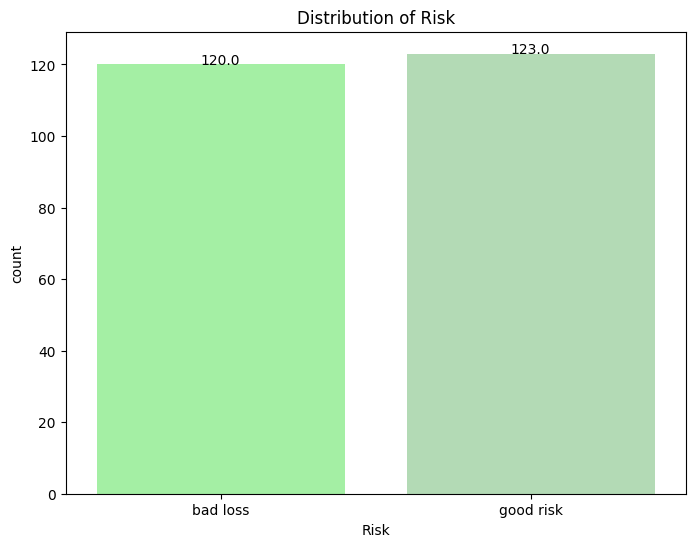

In [84]:
# Explore the distribution of the 'Risk' variable
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='Risk', data=ClassifyRisk1, palette = {'bad loss': '#98FB98', 'good risk': '#ACE1AF'})
plt.title('Distribution of Risk')

# Annotate each bar with its count
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='baseline')

plt.show()

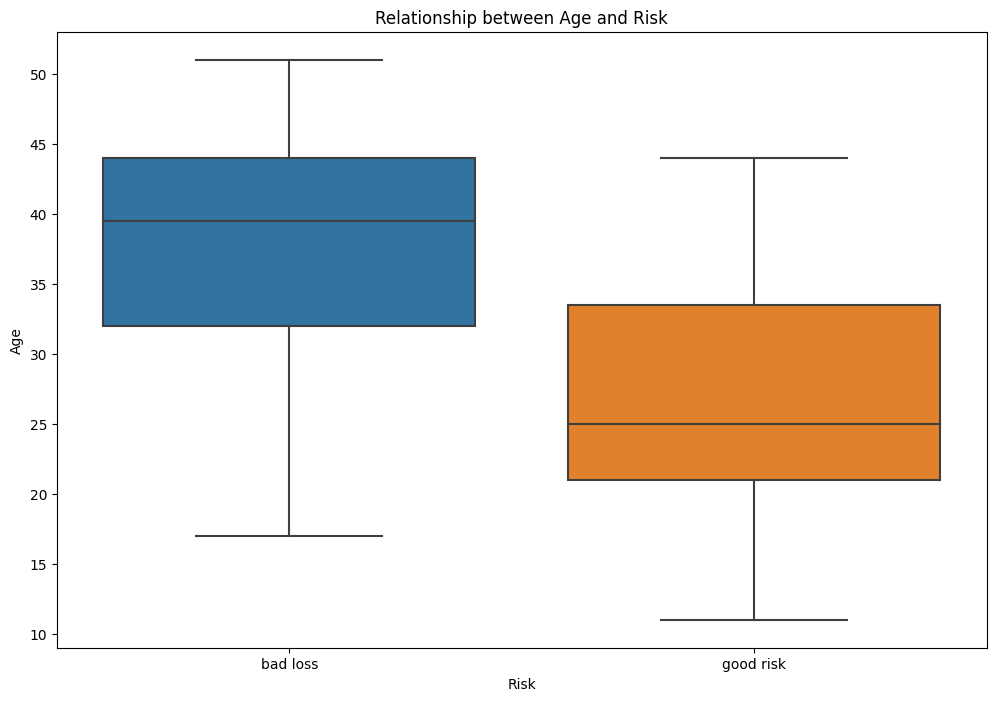

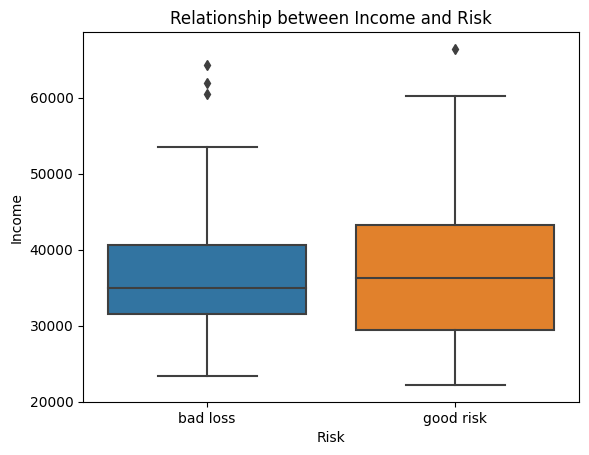

In [85]:
# Explore relationships between predictor variables and 'Risk'
# Assuming you have numerical predictor variables
numerical_predictors = ClassifyRisk1.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(12, 8))
for predictor in numerical_predictors:
    sns.boxplot(x='Risk', y=predictor, data=ClassifyRisk1)
    plt.title(f'Relationship between {predictor} and Risk')
    plt.show()

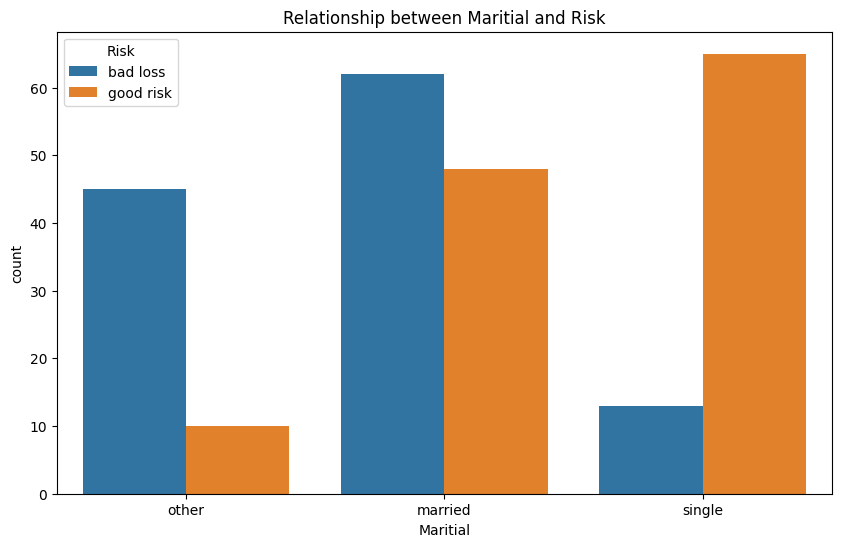

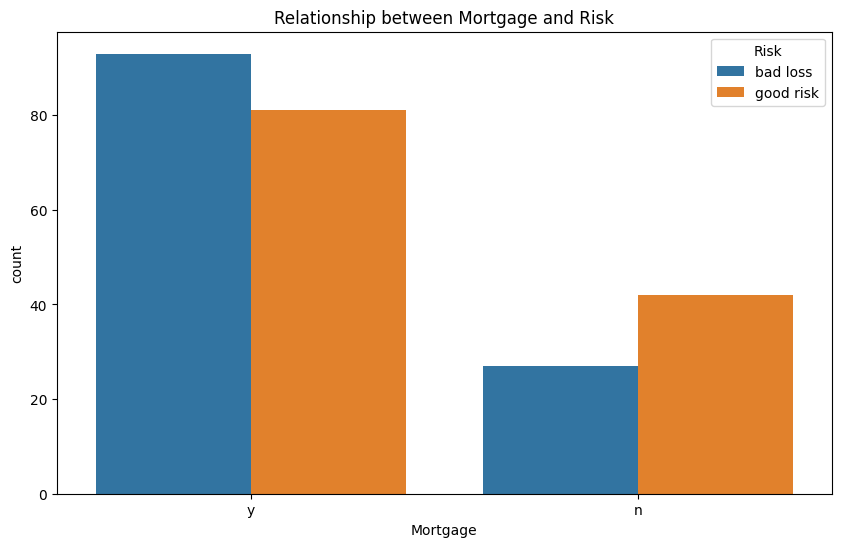

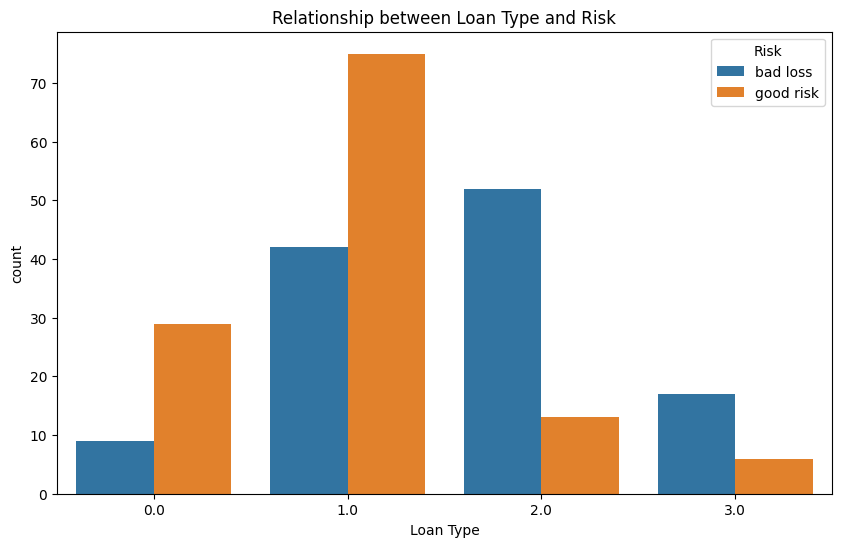

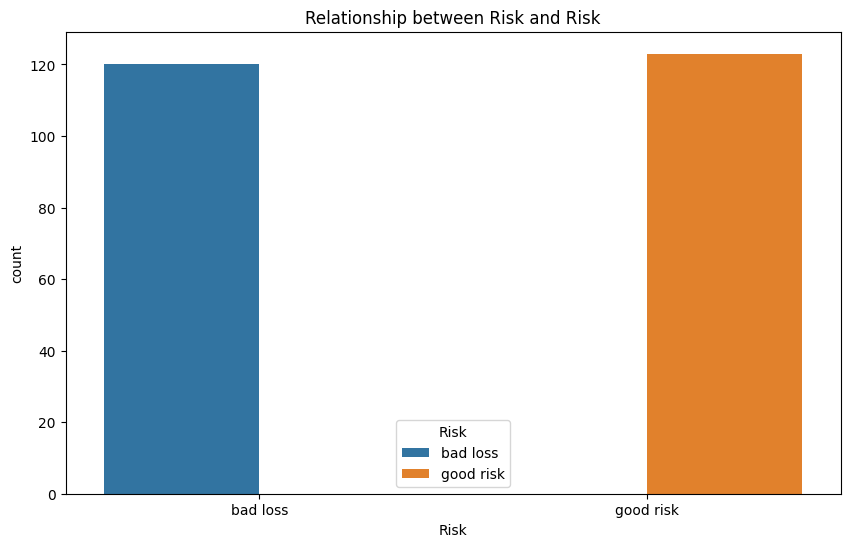

In [86]:
# Assuming you have categorical predictor variables
categorical_predictors = ClassifyRisk1.select_dtypes(include=['object']).columns

for predictor in categorical_predictors:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=predictor, hue='Risk', data=ClassifyRisk1)
    plt.title(f'Relationship between {predictor} and Risk')
    plt.show()

Now, we need to enconde our variables. We will start encoding mortgage

In [92]:
# Assuming 'df' is your DataFrame
categorical_columns = ClassifyRisk1.select_dtypes(include=['object']).columns

for column in categorical_columns:
    class_counts = ClassifyRisk1[column].value_counts()
    print(f"Counts for variable '{column}':\n{class_counts}\n")

Counts for variable 'Maritial':
married    110
single      78
other       55
Name: Maritial, dtype: int64

Counts for variable 'Mortgage':
y    174
n     69
Name: Mortgage, dtype: int64

Counts for variable 'Loan Type':
1.0    117
2.0     65
0.0     38
3.0     23
Name: Loan Type, dtype: int64

Counts for variable 'Risk':
good risk    123
bad loss     120
Name: Risk, dtype: int64



In [95]:
# Encoding variable Mortgage
label_encoder = LabelEncoder()
ClassifyRisk1['Mortgage'] = label_encoder.fit_transform(ClassifyRisk1['Mortgage'])

In [98]:
# Checking Class Distribution
class_distribution = ClassifyRisk1['Mortgage'].value_counts()

print(class_distribution)

1    174
0     69
Name: Mortgage, dtype: int64


In [101]:
# Encoding Variable Martial
label_encoder1 = LabelEncoder()
ClassifyRisk1['Maritial'] = label_encoder1.fit_transform(ClassifyRisk1['Maritial'])

In [102]:
# Checking class distribution
class_distribution1 = ClassifyRisk1['Maritial'].value_counts()

print(class_distribution1)

0    110
2     78
1     55
Name: Maritial, dtype: int64


In [103]:
# Encoding Variable Martial
label_encoder2 = LabelEncoder()
ClassifyRisk1['Risk'] = label_encoder1.fit_transform(ClassifyRisk1['Risk'])

In [105]:
# Checking class distribution
class_distribution2 = ClassifyRisk1['Risk'].value_counts()

print(class_distribution2)

1    123
0    120
Name: Risk, dtype: int64


### **QUESTION 3**

Now, we will create our datasplit

In [106]:
#  We specify our features (X) and target variable (y)
X = ClassifyRisk1.drop('Risk', axis=1)
y = ClassifyRisk1['Risk']

# Perform the 80:20 train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [107]:
print("Number of rows in Training Data:", X_train.shape[0])
print("Number of rows in Testing Data:", X_test.shape[0])

Number of rows in Training Data: 194
Number of rows in Testing Data: 49


### **QUESTION 4**

In [109]:
# Define a list of different numbers of neighbors to try
k_values = [1, 3, 5, 7, 9]

# Iterate over different k values and train a KNN classifier for each
for k in k_values:
    # Create KNN classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier on the training data
    knn_classifier.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = knn_classifier.predict(X_test)

    # Evaluate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)

    # Print the results
    print(f"Number of Neighbors (k): {k} - Accuracy: {accuracy:.4f}")

Number of Neighbors (k): 1 - Accuracy: 0.5306
Number of Neighbors (k): 3 - Accuracy: 0.5306
Number of Neighbors (k): 5 - Accuracy: 0.5306
Number of Neighbors (k): 7 - Accuracy: 0.5102
Number of Neighbors (k): 9 - Accuracy: 0.5306


In [118]:
# Define a list of different numbers of neighbors to try
k_values = [11, 13, 15, 17, 21]

# Iterate over different k values and train a KNN classifier for each
for k in k_values:
    # Create KNN classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier on the training data
    knn_classifier.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = knn_classifier.predict(X_test)

    # Evaluate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)

    # Evaluate the sensitivity (recall) of the model
    sensitivity = recall_score(y_test, y_pred)

    # Calculate the predicted probabilities for class 1 (positive class)
    y_pred_proba = knn_classifier.predict_proba(X_test)[:, 1]

    # Evaluate the AUC-ROC score
    auc_roc = roc_auc_score(y_test, y_pred_proba)

    # Print the results
    print(f"Number of Neighbors (k): {k}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Sensitivity (Recall): {sensitivity:.4f}")
    print(f"AUC-ROC: {auc_roc:.4f}")
    print("="*30)

Number of Neighbors (k): 11
Accuracy: 0.6122
Sensitivity (Recall): 0.6522
AUC-ROC: 0.5895
Number of Neighbors (k): 13
Accuracy: 0.5918
Sensitivity (Recall): 0.6522
AUC-ROC: 0.5920
Number of Neighbors (k): 15
Accuracy: 0.5510
Sensitivity (Recall): 0.5652
AUC-ROC: 0.5677
Number of Neighbors (k): 17
Accuracy: 0.6327
Sensitivity (Recall): 0.6087
AUC-ROC: 0.6003
Number of Neighbors (k): 21
Accuracy: 0.6122
Sensitivity (Recall): 0.5217
AUC-ROC: 0.5401


Now, we decided to choose model with k=17. For this model we will find the confusion matrix and graph THE AUC

Number of Neighbors (k): 17
Accuracy: 0.6327
Sensitivity (Recall): 0.6087
AUC-ROC: 0.6003
Confusion Matrix:
[[17  9]
 [ 9 14]]


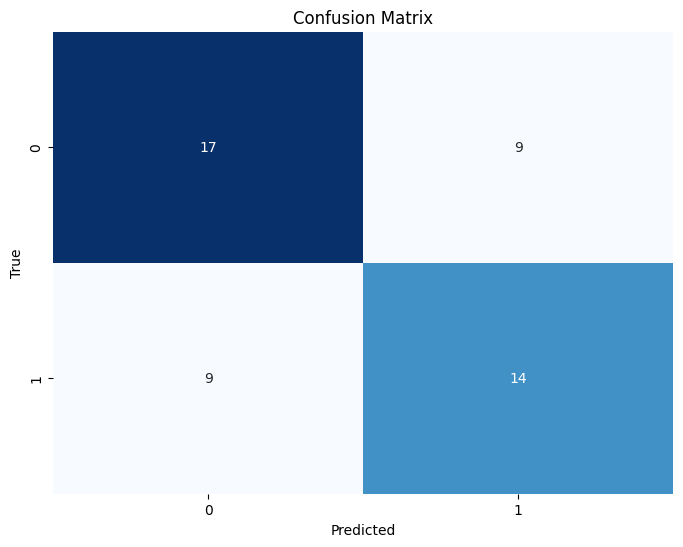

In [124]:
# Number of neighbors for the KNN classifier
k = 17

# Create KNN classifier with 17 neighbors
knn_classifier = KNeighborsClassifier(n_neighbors=k)

# Fit the classifier on the training data
knn_classifier.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = knn_classifier.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)

# Evaluate the sensitivity (recall) of the model
sensitivity = recall_score(y_test, y_pred)

# Calculate the predicted probabilities for class 1 (positive class)
y_pred_proba = knn_classifier.predict_proba(X_test)[:, 1]

# Evaluate the AUC-ROC score
auc_roc = roc_auc_score(y_test, y_pred_proba)

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the results
print(f"Number of Neighbors (k): {k}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Sensitivity (Recall): {sensitivity:.4f}")
print(f"AUC-ROC: {auc_roc:.4f}")
print("Confusion Matrix:")
print(cm)

# Display the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

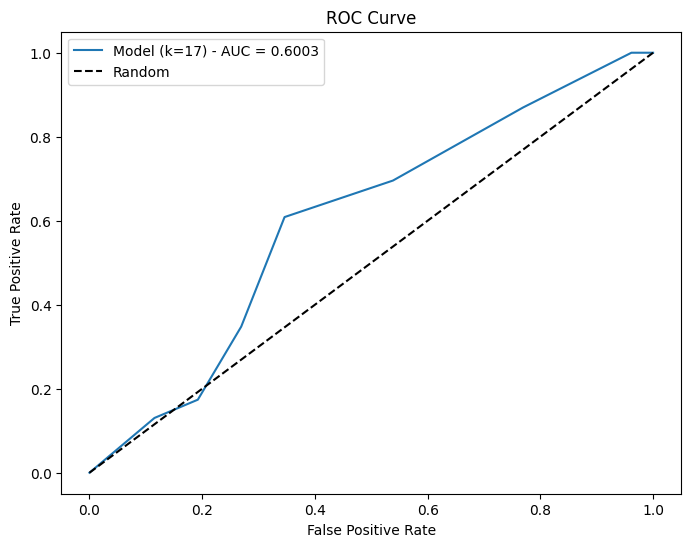

In [125]:
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Model (k={k}) - AUC = {auc_roc:.4f}')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()